# IMPORT LIBRARIES

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# LOAD DATASET 

In [4]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["id", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)
data.head()

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# CLASS DISTRIBUTION

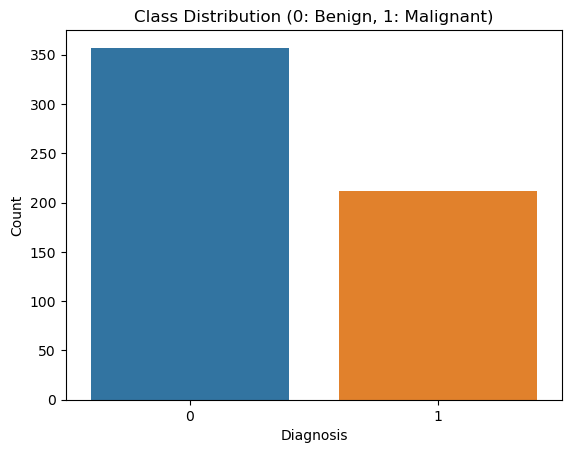

In [14]:
# Plot class distribution
sns.countplot(x="diagnosis", data=data)
plt.title("Class Distribution (0: Benign, 1: Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# CORRELATION MAP

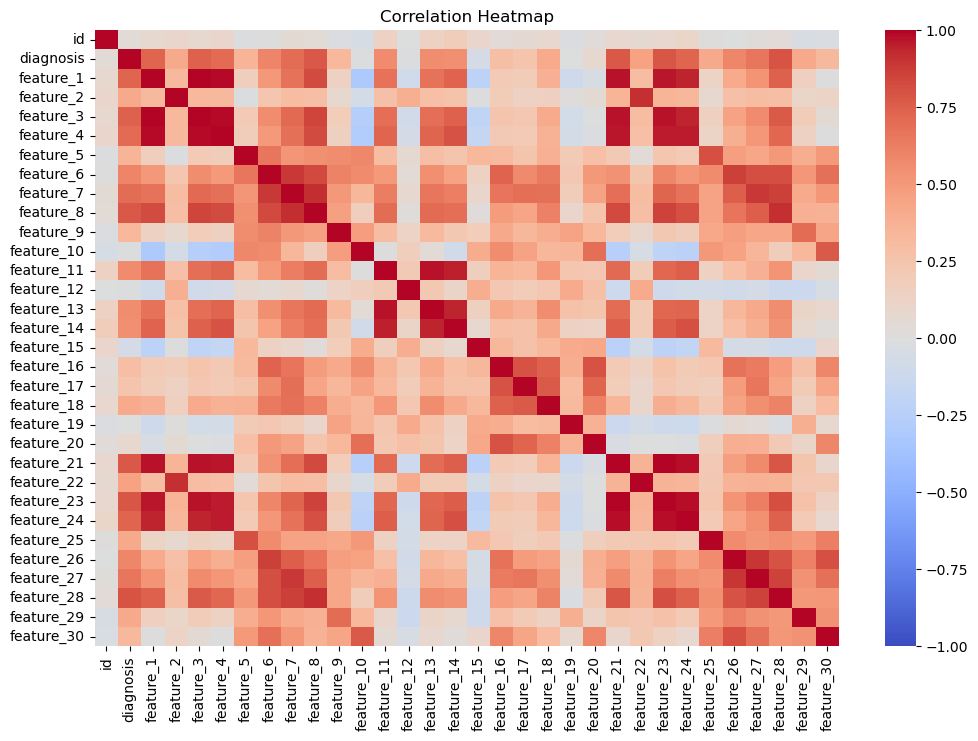

In [18]:
# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Extract correlation with the target variable (diagnosis)
corr_with_target = corr["diagnosis"].drop("diagnosis")  # Drop the target itself

# Sort features by absolute correlation value (most relevant first)
sorted_corr = corr_with_target.abs().sort_values(ascending=False)

# Plot the top N most relevant features
top_n = 10  # Number of top features to display
top_features = sorted_corr.head(top_n)
# Display the most relevant features
print("Most Relevant Features with Diagnosis:")
print(top_features)

Most Relevant Features with Diagnosis:
feature_28    0.793566
feature_23    0.782914
feature_8     0.776614
feature_21    0.776454
feature_3     0.742636
feature_24    0.733825
feature_1     0.730029
feature_4     0.708984
feature_7     0.696360
feature_27    0.659610
Name: diagnosis, dtype: float64


# FEATURE DISTRIBUTION OF TOP CORRELATED FEATURES

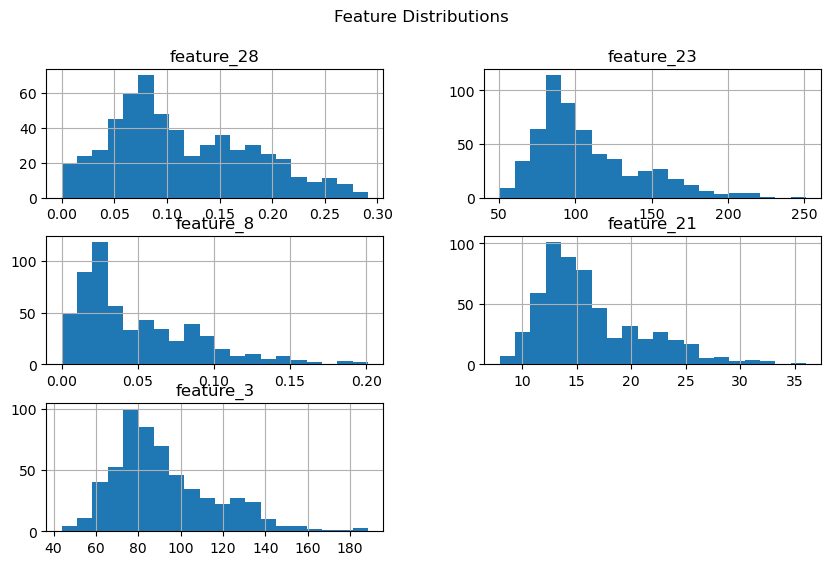

In [21]:
# Plot histograms for a few features
features_to_plot = ["feature_28", "feature_23", "feature_8","feature_21", "feature_3"]
data[features_to_plot].hist(bins=20, figsize=(10, 6))
plt.suptitle("Feature Distributions")
plt.show()

# DATA PREPROCESSING

In [5]:
# Convert diagnosis to binary values (M = 1, B = 0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Split the data into features (X) and target (y)
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL TRAINING

In [6]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# MODEL EVALUATION

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



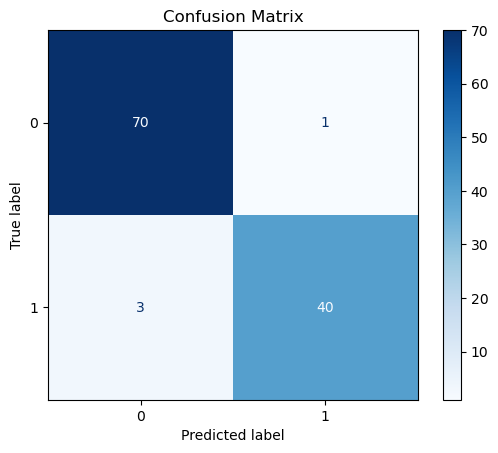

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()